In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras


x_train:  (60000, 28, 28)
x_test:  (10000, 28, 28)


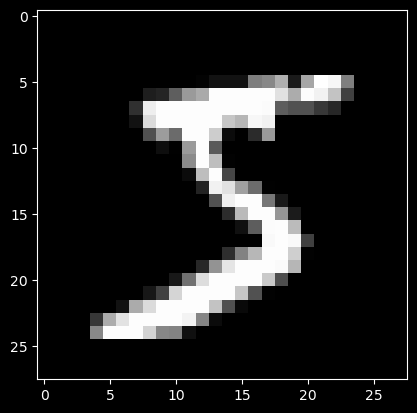

y_train:  5


In [2]:
(x_train, y_train), (x_test, y_test) =  keras.datasets.mnist.load_data()
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)

# Plot a train image
plt.imshow(x_train[0], cmap='gray')
plt.show()

print("y_train: ", y_train[0])


In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test.reshape(x_test.shape[0], x_train.shape[1]*x_train.shape[2])

print("x_train_flatten: ", x_train_flatten.shape)
print("x_test_flatten: ", x_test_flatten.shape)
print(x_train_flatten[0][350:375])


x_train_flatten:  (60000, 784)
x_test_flatten:  (10000, 784)
[70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]


In [4]:
x_train_flatten = x_train_flatten / 255
x_test_flatten = x_test_flatten / 255
print(x_train_flatten[0][350:375])


[0.2745098 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.       ]


In [5]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
print("y_train_cat(5): ", y_train_cat[0])


y_train_cat(5):  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [8]:
history = model.fit(x_train_flatten, y_train_cat, batch_size=128, epochs=12, verbose=1, validation_split=0.2)


Epoch 1/12
375/375 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8857 - val_loss: 0.2862 - val_accuracy: 0.9212
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2999 - accuracy: 0.9156 - val_loss: 0.2933 - val_accuracy: 0.9172
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2871 - accuracy: 0.9193 - val_loss: 0.2897 - val_accuracy: 0.9182
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2796 - accuracy: 0.9219 - val_loss: 0.2758 - val_accuracy: 0.9241
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.9231 - val_loss: 0.2761 - val_accuracy: 0.9261
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.9241 - val_loss: 0.2720 - val_accuracy: 0.9267
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2652 - accuracy: 0.9264 - val_loss: 0.2700 - val_accuracy: 0.9268
Epoch 

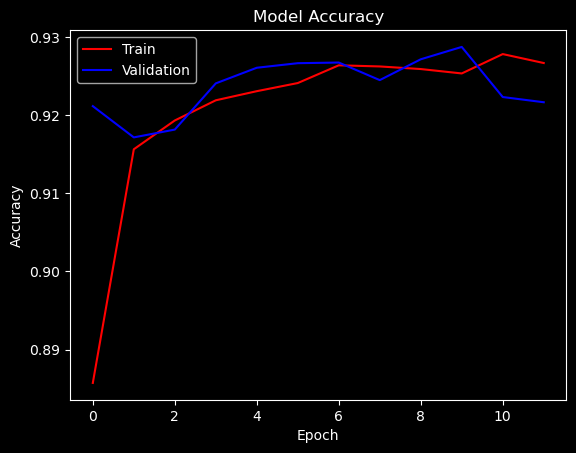

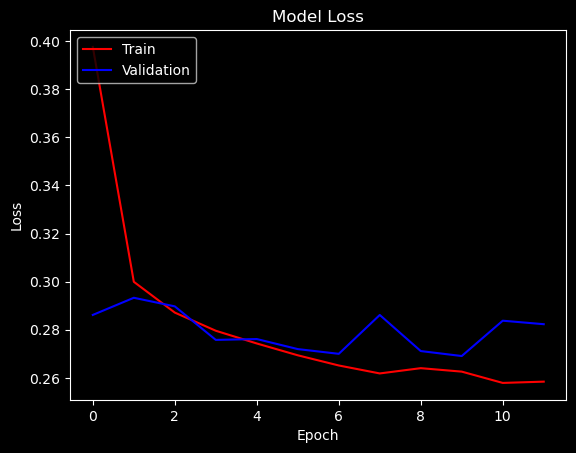

In [9]:
plt.figure(1)
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title('Model Accuracy')

plt.figure(2)
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title('Model Loss')

plt.show()


In [10]:
loss, accuracy = model.evaluate(x_test_flatten, y_test_cat, verbose=0)
print("Accuracy: ", accuracy)
print("Loss: ", loss)


Accuracy:  0.9208999872207642
Loss:  0.2836831510066986


In [11]:
#11
model2 = keras.Sequential()
model2.add(keras.layers.Dense(256, input_shape=(784,), activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))
model2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [13]:
history2 = model2.fit(x_train_flatten, y_train_cat, batch_size=128, epochs=12, verbose=1, validation_split=0.2)


Epoch 1/12
375/375 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.9036 - val_loss: 0.1844 - val_accuracy: 0.9477
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1488 - accuracy: 0.9570 - val_loss: 0.1291 - val_accuracy: 0.9614
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9714 - val_loss: 0.1111 - val_accuracy: 0.9682
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9783 - val_loss: 0.0958 - val_accuracy: 0.9713
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0587 - accuracy: 0.9829 - val_loss: 0.0865 - val_accuracy: 0.9734
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0440 - accuracy: 0.9883 - val_loss: 0.0832 - val_accuracy: 0.9749
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0347 - accuracy: 0.9910 - val_loss: 0.0788 - val_accuracy: 0.9762
Epoch 

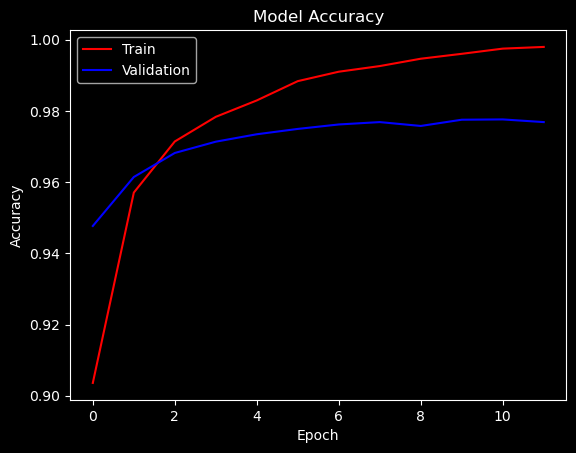

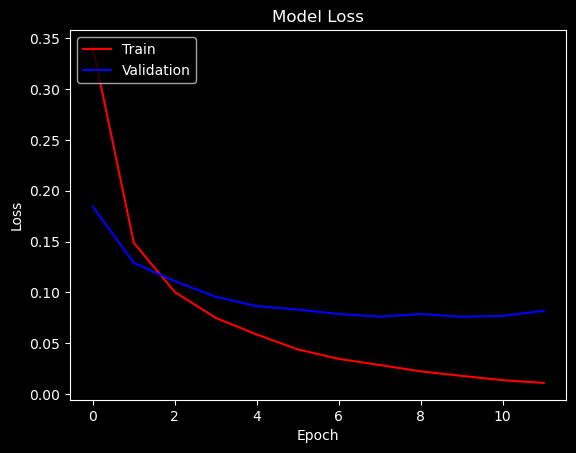

In [14]:
plt.figure(1)
plt.plot(history2.history['accuracy'], color='red')
plt.plot(history2.history['val_accuracy'], color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title('Model Accuracy')

plt.figure(2)
plt.plot(history2.history['loss'], color='red')
plt.plot(history2.history['val_loss'], color='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title('Model Loss')

plt.show()


In [15]:
loss, accuracy = model2.evaluate(x_test_flatten, y_test_cat, verbose=0)
print("Accuracy: ", accuracy)
print("Loss: ", loss)


Accuracy:  0.9781000018119812
Loss:  0.0752432569861412


In [16]:
x_train_conv = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test_conv = x_test.reshape(x_test.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("x_train_conv: ", x_train_conv.shape)


x_train_conv:  (60000, 28, 28, 1)


In [17]:
model3 = keras.Sequential()
model3.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model3.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128, activation="relu"))
model3.add(keras.layers.Dense(10, activation="softmax"))
model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [18]:
model3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=float(1)), metrics=["accuracy"])


In [19]:
history3 = model3.fit(x_train_conv, y_train_cat, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
375/375 [==============================] - 21s 56ms/step - loss: 1.0463 - accuracy: 0.9317 - val_loss: 0.0755 - val_accuracy: 0.9791
Epoch 2/6
375/375 [==============================] - 22s 58ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0554 - val_accuracy: 0.9857
Epoch 3/6
375/375 [==============================] - 23s 61ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0639 - val_accuracy: 0.9843
Epoch 4/6
375/375 [==============================] - 22s 58ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0561 - val_accuracy: 0.9884
Epoch 5/6
375/375 [==============================] - 23s 60ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0872 - val_accuracy: 0.9852
Epoch 6/6
375/375 [==============================] - 23s 61ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0838 - val_accuracy: 0.9877


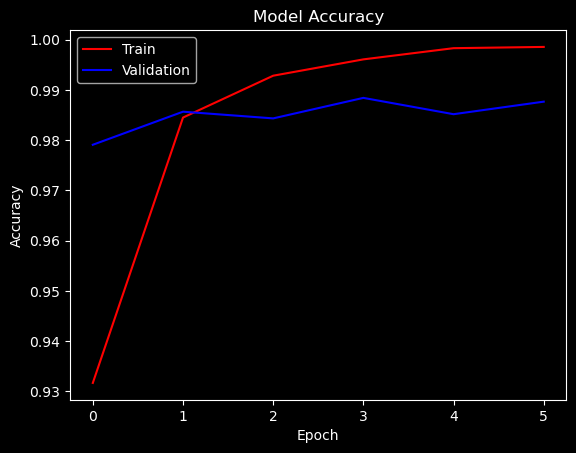

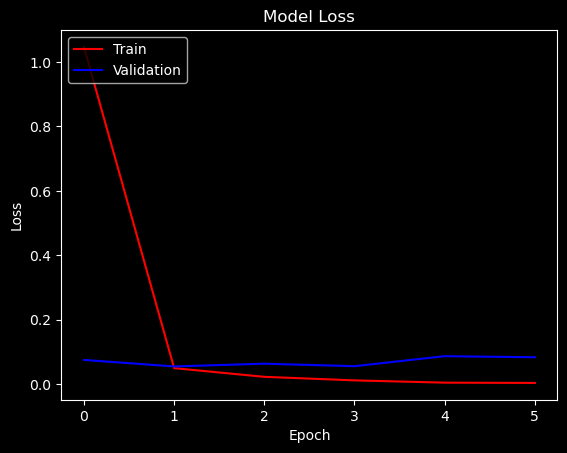

In [20]:
plt.figure(1)
plt.plot(history3.history['accuracy'], color='red')
plt.plot(history3.history['val_accuracy'], color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title('Model Accuracy')

plt.figure(2)
plt.plot(history3.history['loss'], color='red')
plt.plot(history3.history['val_loss'], color='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title('Model Loss')

plt.show()


In [21]:
loss, accuracy = model3.evaluate(x_test_conv, y_test_cat, verbose=0)
print("Accuracy: ", accuracy)
print("Loss: ", loss)


Accuracy:  0.987500011920929
Loss:  0.06829451769590378


In [22]:
model4 = keras.Sequential()
model4.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model4.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model4.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model4.add(keras.layers.Dropout(rate=0.25))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(128, activation="relu"))
model4.add(keras.layers.Dropout(rate=0.5))
model4.add(keras.layers.Dense(10, activation="softmax"))
model4.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                      

In [23]:
model4.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=float(1)), metrics=["accuracy"])


In [24]:
history4 = model4.fit(x_train_conv, y_train_cat, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
375/375 [==============================] - 26s 69ms/step - loss: 0.9535 - accuracy: 0.8542 - val_loss: 0.0888 - val_accuracy: 0.9733
Epoch 2/6
375/375 [==============================] - 23s 61ms/step - loss: 0.1588 - accuracy: 0.9557 - val_loss: 0.0614 - val_accuracy: 0.9838
Epoch 3/6
375/375 [==============================] - 24s 65ms/step - loss: 0.1024 - accuracy: 0.9709 - val_loss: 0.0548 - val_accuracy: 0.9855
Epoch 4/6
375/375 [==============================] - 25s 66ms/step - loss: 0.0835 - accuracy: 0.9753 - val_loss: 0.0563 - val_accuracy: 0.9856
Epoch 5/6
375/375 [==============================] - 24s 65ms/step - loss: 0.0682 - accuracy: 0.9799 - val_loss: 0.0489 - val_accuracy: 0.9872
Epoch 6/6
375/375 [==============================] - 25s 67ms/step - loss: 0.0581 - accuracy: 0.9837 - val_loss: 0.0455 - val_accuracy: 0.9889


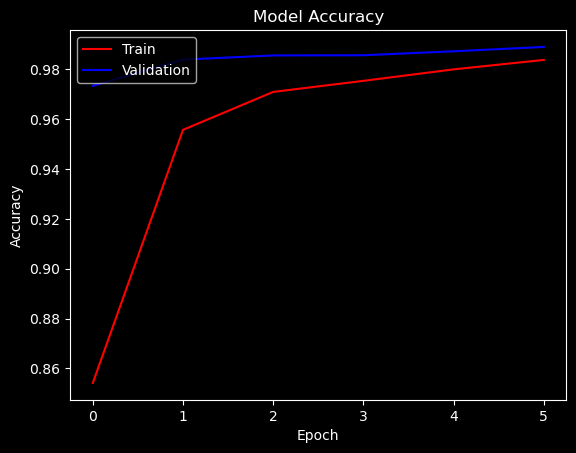

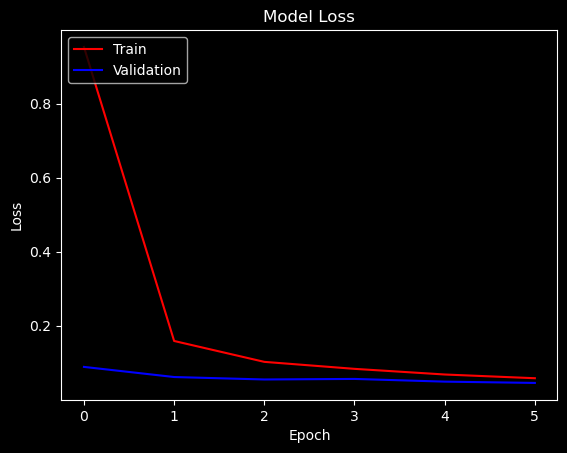

In [25]:
plt.figure(1)
plt.plot(history4.history['accuracy'], color='red')
plt.plot(history4.history['val_accuracy'], color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title('Model Accuracy')

plt.figure(2)
plt.plot(history4.history['loss'], color='red')
plt.plot(history4.history['val_loss'], color='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title('Model Loss')

plt.show()


In [26]:
loss, accuracy = model4.evaluate(x_test_conv, y_test_cat, verbose=0)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

Accuracy:  0.9872999787330627
Loss:  0.03936658799648285
